In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cv2
import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torchvision.transforms as transforms
from dish_autoencooder import DishAutoencoderV1, DishAutoencoderV2
    

In [2]:
PATH_GPU = "/home/pgliwny/computer_vision_project/data"
PATH_ADATA = "/media/pgliwny/ADATA HD330/Computer_vision_for_MAGIC/prepare_images/data"
H5_PATH = os.path.join(PATH_GPU, "webcam_images.h5")

In [3]:
event_id = 15
f = h5py.File(H5_PATH, "r")
keys = list(f["images"].keys())
img = f["images"][keys[event_id]]["image"][:]

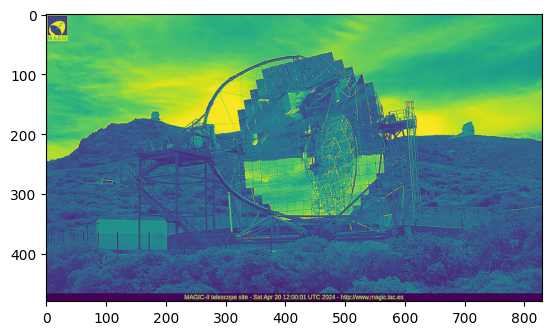

In [4]:
plt.imshow(img)

In [5]:
img.shape

(480, 830)

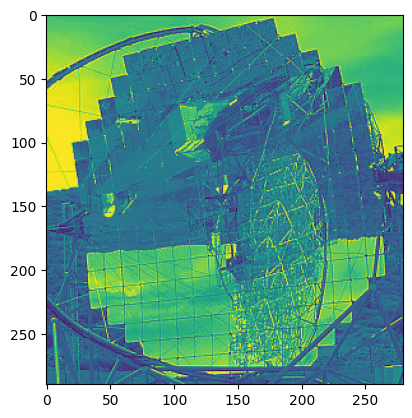

In [6]:
dish_img = img[60:350, 300:580]
plt.imshow(dish_img)

In [13]:
dish_img.shape

(290, 280)

In [5]:
class DishImageDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image

In [6]:
img_dish = np.zeros((100, 1, 290, 280))
for i, event_id in enumerate(range(100)):
    img = f["images"][keys[event_id]]["image"][:]
    new_img = img[60:350, 300:580]
    img_dish[i, :, :, :] = new_img

In [7]:
# Preprocess and normalize the images
X_tensor = torch.tensor(img_dish, dtype=torch.float32)

# Normalize to range [0, 1] and make sure the tensor is of correct shape
X_tensor = (X_tensor - X_tensor.min()) / (X_tensor.max() - X_tensor.min())  # Normalize

# Define transform for input image if needed
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Dataset and DataLoader
dataset = DishImageDataset(X_tensor, transform=transform)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)


In [16]:


# Define the model (DishAutoencoder) with feature_dim=64 as you provided earlier
model = DishAutoencoder(feature_dim=64)

# Loss function (Mean Squared Error Loss for reconstruction)
criterion = nn.MSELoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 80
model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    for images in tqdm.tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()  # Zero the gradients

        # Make sure the images tensor is of correct shape: [batch_size, channels, height, width]
        images = images.float()

        # Forward pass: Get the reconstructed image and feature vector
        reconstructed, feature_vector = model(images)

        # Compute the reconstruction loss
        loss = criterion(reconstructed, images)  # Comparing the original image with the reconstructed image

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Print average loss for the epoch
    avg_loss = running_loss / len(data_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch 1/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [1/80], Loss: 0.3074


Epoch 2/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [2/80], Loss: 0.2956


Epoch 3/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Epoch [3/80], Loss: 0.2897


Epoch 4/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [4/80], Loss: 0.2651


Epoch 5/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [5/80], Loss: 0.2159


Epoch 6/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch [6/80], Loss: 0.1962


Epoch 7/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Epoch [7/80], Loss: 0.1884


Epoch 8/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Epoch [8/80], Loss: 0.1784


Epoch 9/80: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [9/80], Loss: 0.1674


Epoch 10/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [10/80], Loss: 0.1585


Epoch 11/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [11/80], Loss: 0.1459


Epoch 12/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [12/80], Loss: 0.1359


Epoch 13/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [13/80], Loss: 0.1294


Epoch 14/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [14/80], Loss: 0.1261


Epoch 15/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [15/80], Loss: 0.1217


Epoch 16/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Epoch [16/80], Loss: 0.1194


Epoch 17/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [17/80], Loss: 0.1172


Epoch 18/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [18/80], Loss: 0.1144


Epoch 19/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [19/80], Loss: 0.1131


Epoch 20/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Epoch [20/80], Loss: 0.1092


Epoch 21/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Epoch [21/80], Loss: 0.1079


Epoch 22/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [22/80], Loss: 0.1047


Epoch 23/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [23/80], Loss: 0.1061


Epoch 24/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Epoch [24/80], Loss: 0.1050


Epoch 25/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Epoch [25/80], Loss: 0.1041


Epoch 26/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Epoch [26/80], Loss: 0.1033


Epoch 27/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [27/80], Loss: 0.1032


Epoch 28/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch [28/80], Loss: 0.1025


Epoch 29/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch [29/80], Loss: 0.1019


Epoch 30/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [30/80], Loss: 0.1017


Epoch 31/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [31/80], Loss: 0.1015


Epoch 32/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [32/80], Loss: 0.1015


Epoch 33/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [33/80], Loss: 0.1009


Epoch 34/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [34/80], Loss: 0.1002


Epoch 35/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [35/80], Loss: 0.1006


Epoch 36/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Epoch [36/80], Loss: 0.0999


Epoch 37/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [37/80], Loss: 0.0987


Epoch 38/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Epoch [38/80], Loss: 0.0994


Epoch 39/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [39/80], Loss: 0.0990


Epoch 40/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch [40/80], Loss: 0.0986


Epoch 41/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Epoch [41/80], Loss: 0.0965


Epoch 42/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Epoch [42/80], Loss: 0.0987


Epoch 43/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [43/80], Loss: 0.0981


Epoch 44/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [44/80], Loss: 0.0969


Epoch 45/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [45/80], Loss: 0.0986


Epoch 46/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [46/80], Loss: 0.0983


Epoch 47/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Epoch [47/80], Loss: 0.0978


Epoch 48/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Epoch [48/80], Loss: 0.0999


Epoch 49/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Epoch [49/80], Loss: 0.0968


Epoch 50/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Epoch [50/80], Loss: 0.0972


Epoch 51/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Epoch [51/80], Loss: 0.0975


Epoch 52/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Epoch [52/80], Loss: 0.0971


Epoch 53/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Epoch [53/80], Loss: 0.0972


Epoch 54/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch [54/80], Loss: 0.0965


Epoch 55/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [55/80], Loss: 0.0944


Epoch 56/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [56/80], Loss: 0.0971


Epoch 57/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [57/80], Loss: 0.0961


Epoch 58/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Epoch [58/80], Loss: 0.0979


Epoch 59/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [59/80], Loss: 0.0960


Epoch 60/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [60/80], Loss: 0.0977


Epoch 61/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [61/80], Loss: 0.0961


Epoch 62/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Epoch [62/80], Loss: 0.0937


Epoch 63/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [63/80], Loss: 0.0956


Epoch 64/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [64/80], Loss: 0.0956


Epoch 65/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Epoch [65/80], Loss: 0.0937


Epoch 66/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [66/80], Loss: 0.0954


Epoch 67/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Epoch [67/80], Loss: 0.0954


Epoch 68/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [68/80], Loss: 0.0955


Epoch 69/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch [69/80], Loss: 0.0952


Epoch 70/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [70/80], Loss: 0.0955


Epoch 71/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [71/80], Loss: 0.0950


Epoch 72/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [72/80], Loss: 0.0947


Epoch 73/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [73/80], Loss: 0.0946


Epoch 74/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [74/80], Loss: 0.0966


Epoch 75/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [75/80], Loss: 0.0967


Epoch 76/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Epoch [76/80], Loss: 0.0946


Epoch 77/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [77/80], Loss: 0.0963


Epoch 78/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [78/80], Loss: 0.0945


Epoch 79/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [79/80], Loss: 0.0935


Epoch 80/80: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]

Epoch [80/80], Loss: 0.0938


In [17]:
torch.save(model.state_dict(), "autoencoder_dish.pt")

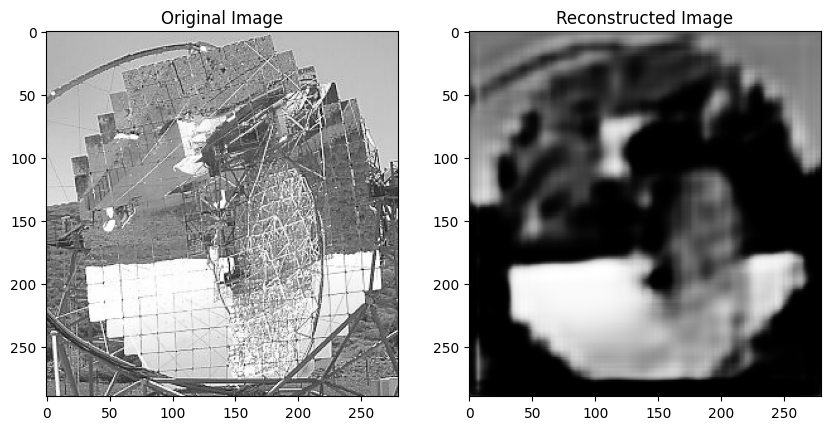

In [18]:

# Zakładając, że masz dane wejściowe 'images' i chcesz zobaczyć rekonstrukcję
model.eval()  # Ustaw model w tryb oceny (bez backpropagacji)

with torch.no_grad():
    reconstructed, _ = model(images)

# Przekształcenie obrazu do formatu, który można wyświetlić (zakładając, że obrazy mają kształt (1, 280, 290))
original_image = images[3].numpy().squeeze()  # Zmniejszamy wymiary do (280, 290)
reconstructed_image = reconstructed[3].numpy().squeeze()

# Wyświetlenie oryginału i rekonstrukcji
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title("Reconstructed Image")
plt.show()

Epoch 1/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [1/20], Loss: 0.3097


Epoch 2/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [2/20], Loss: 0.3047


Epoch 3/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [3/20], Loss: 0.3002


Epoch 4/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [4/20], Loss: 0.2899


Epoch 5/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [5/20], Loss: 0.2334


Epoch 6/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Epoch [6/20], Loss: 0.1960


Epoch 7/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [7/20], Loss: 0.1909


Epoch 8/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Epoch [8/20], Loss: 0.1800


Epoch 9/20: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [9/20], Loss: 0.1650


Epoch 10/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [10/20], Loss: 0.1544


Epoch 11/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [11/20], Loss: 0.1417


Epoch 12/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Epoch [12/20], Loss: 0.1328


Epoch 13/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch [13/20], Loss: 0.1286


Epoch 14/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Epoch [14/20], Loss: 0.1262


Epoch 15/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [15/20], Loss: 0.1244


Epoch 16/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Epoch [16/20], Loss: 0.1225


Epoch 17/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [17/20], Loss: 0.1183


Epoch 18/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Epoch [18/20], Loss: 0.1170


Epoch 19/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Epoch [19/20], Loss: 0.1154


Epoch 20/20: 100%|████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]

Epoch [20/20], Loss: 0.1101


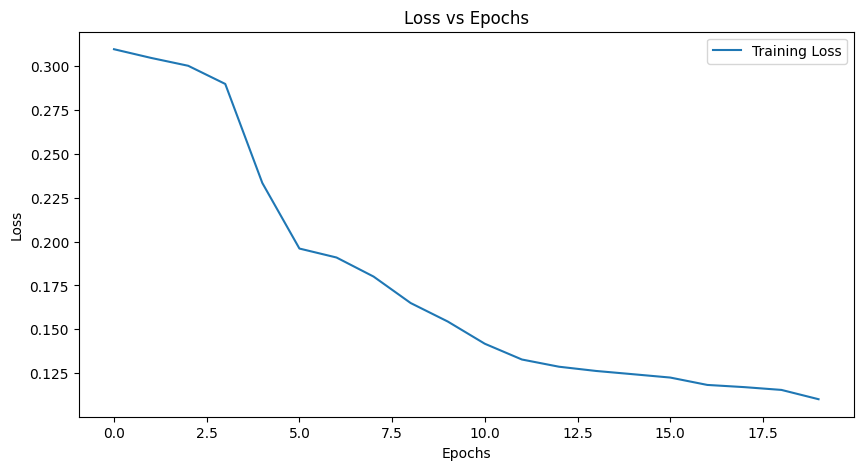

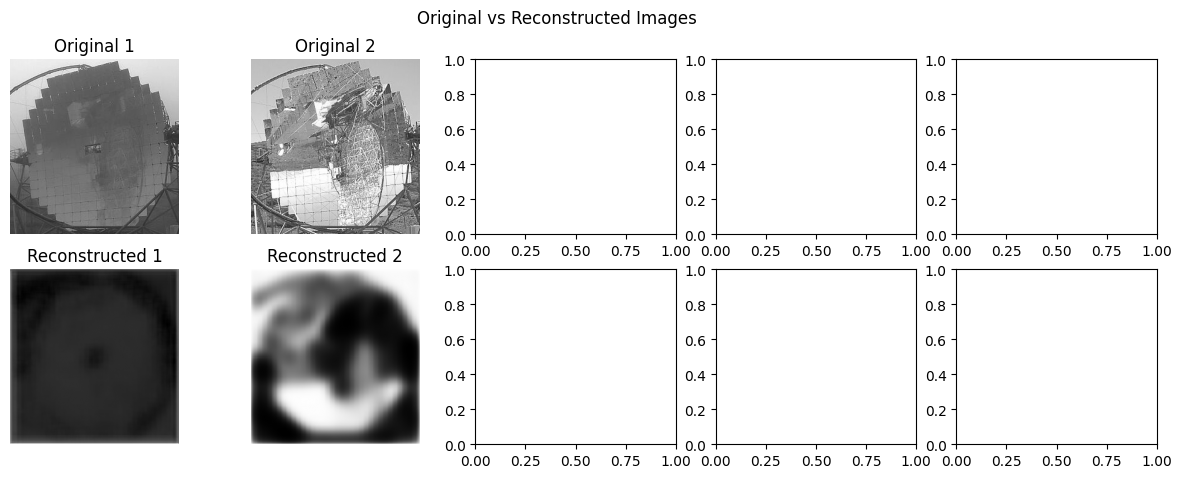

In [24]:
# Assuming the model and dataset are already defined, as you provided

# Define the model (DishAutoencoder) with feature_dim=64 as you provided earlier
model = DishAutoencoderV1(feature_dim=64)

# Loss function (Mean Squared Error Loss for reconstruction)
criterion = nn.MSELoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Initialize lists to track loss and reconstructed images for plotting
epoch_losses = []
original_images = []
reconstructed_images = []

# Training loop
num_epochs = 20
model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    for images in tqdm.tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()  # Zero the gradients

        # Ensure the images tensor is of correct shape: [batch_size, channels, height, width]
        images = images.float()

        # Forward pass: Get the reconstructed image and feature vector
        reconstructed, feature_vector = model(images)

        # Compute the reconstruction loss
        loss = criterion(reconstructed, images)  # Comparing the original image with the reconstructed image

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Calculate average loss for this epoch
    avg_loss = running_loss / len(data_loader)
    epoch_losses.append(avg_loss)

    # Store images for later visualization (you can choose to save them periodically)
    if epoch % 10 == 0:  # For example, save images every 10 epochs
        original_images.append(images[0].detach().cpu().numpy().squeeze())  # Save the first image in the batch
        reconstructed_images.append(reconstructed[0].detach().cpu().numpy().squeeze())  # Save the reconstructed image

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Plotting Loss over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Plotting some original and reconstructed images from the last epoch
# Make sure to visualize only a few images for comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(2):
    axes[0, i].imshow(original_images[i], cmap="gray")
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed_images[i], cmap="gray")
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")

plt.suptitle("Original vs Reconstructed Images")
plt.show()


Epoch 1/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.34it/s]


Epoch [1/50], Loss: 0.3137


Epoch 2/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.55it/s]


Epoch [2/50], Loss: 0.3228


Epoch 3/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.53it/s]


Epoch [3/50], Loss: 0.3145


Epoch 4/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.54it/s]


Epoch [4/50], Loss: 0.3127


Epoch 5/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.42it/s]


Epoch [5/50], Loss: 0.3076


Epoch 6/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.56it/s]


Epoch [6/50], Loss: 0.3053


Epoch 7/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.34it/s]


Epoch [7/50], Loss: 0.3038


Epoch 8/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.45it/s]


Epoch [8/50], Loss: 0.3128


Epoch 9/50: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 10.53it/s]


Epoch [9/50], Loss: 0.2936


Epoch 10/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.94it/s]


Epoch [10/50], Loss: 0.2724


Epoch 11/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.64it/s]


Epoch [11/50], Loss: 0.2367


Epoch 12/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.60it/s]


Epoch [12/50], Loss: 0.1917


Epoch 13/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.67it/s]


Epoch [13/50], Loss: 0.1680


Epoch 14/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.41it/s]


Epoch [14/50], Loss: 0.1603


Epoch 15/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.75it/s]


Epoch [15/50], Loss: 0.1532


Epoch 16/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.51it/s]


Epoch [16/50], Loss: 0.1458


Epoch 17/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.18it/s]


Epoch [17/50], Loss: 0.1407


Epoch 18/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.31it/s]


Epoch [18/50], Loss: 0.1383


Epoch 19/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.45it/s]


Epoch [19/50], Loss: 0.1374


Epoch 20/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.44it/s]


Epoch [20/50], Loss: 0.1332


Epoch 21/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.18it/s]


Epoch [21/50], Loss: 0.1315


Epoch 22/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.35it/s]


Epoch [22/50], Loss: 0.1287


Epoch 23/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.66it/s]


Epoch [23/50], Loss: 0.1269


Epoch 24/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.07it/s]


Epoch [24/50], Loss: 0.1252


Epoch 25/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.51it/s]


Epoch [25/50], Loss: 0.1235


Epoch 26/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.20it/s]


Epoch [26/50], Loss: 0.1210


Epoch 27/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.32it/s]


Epoch [27/50], Loss: 0.1222


Epoch 28/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.32it/s]


Epoch [28/50], Loss: 0.1201


Epoch 29/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.32it/s]


Epoch [29/50], Loss: 0.1201


Epoch 30/50: 100%|████████████████████████████████| 7/7 [00:00<00:00,  9.93it/s]


Epoch [30/50], Loss: 0.1195


Epoch 31/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.01it/s]


Epoch [31/50], Loss: 0.1198


Epoch 32/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.17it/s]


Epoch [32/50], Loss: 0.1192


Epoch 33/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.41it/s]


Epoch [33/50], Loss: 0.1188


Epoch 34/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.31it/s]


Epoch [34/50], Loss: 0.1177


Epoch 35/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.27it/s]


Epoch [35/50], Loss: 0.1160


Epoch 36/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.00it/s]


Epoch [36/50], Loss: 0.1175


Epoch 37/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.17it/s]


Epoch [37/50], Loss: 0.1187


Epoch 38/50: 100%|████████████████████████████████| 7/7 [00:00<00:00,  9.99it/s]


Epoch [38/50], Loss: 0.1168


Epoch 39/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.50it/s]


Epoch [39/50], Loss: 0.1162


Epoch 40/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.64it/s]


Epoch [40/50], Loss: 0.1160


Epoch 41/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.57it/s]


Epoch [41/50], Loss: 0.1164


Epoch 42/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.34it/s]


Epoch [42/50], Loss: 0.1145


Epoch 43/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.15it/s]


Epoch [43/50], Loss: 0.1165


Epoch 44/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.15it/s]


Epoch [44/50], Loss: 0.1145


Epoch 45/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.12it/s]


Epoch [45/50], Loss: 0.1142


Epoch 46/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.33it/s]


Epoch [46/50], Loss: 0.1123


Epoch 47/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.37it/s]


Epoch [47/50], Loss: 0.1135


Epoch 48/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.42it/s]


Epoch [48/50], Loss: 0.1130


Epoch 49/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.21it/s]


Epoch [49/50], Loss: 0.1124


Epoch 50/50: 100%|████████████████████████████████| 7/7 [00:00<00:00, 10.03it/s]


Epoch [50/50], Loss: 0.1111


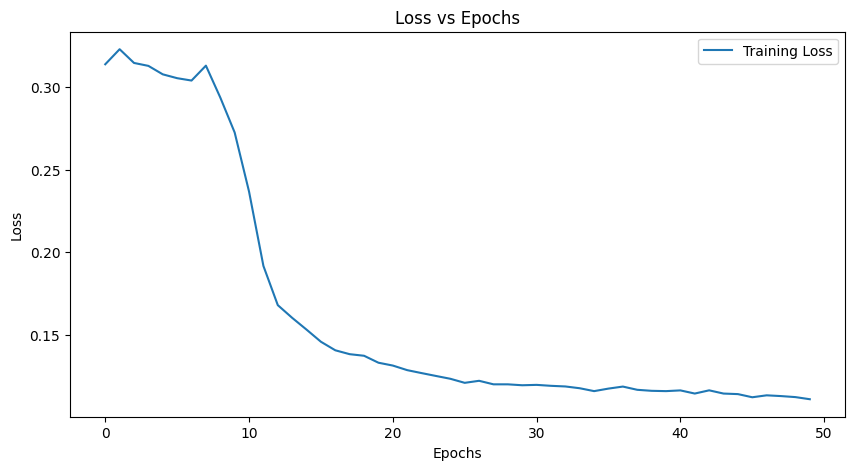

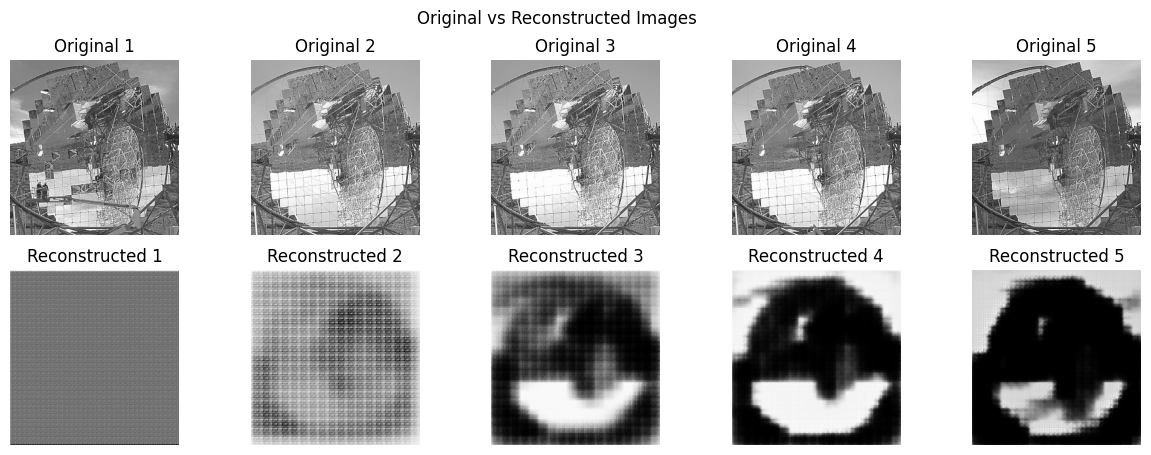

In [10]:


# Define the model (DishAutoencoder) with feature_dim=64 as you provided earlier
model = DishAutoencoderV2(feature_dim=64)

# Loss function (Mean Squared Error Loss for reconstruction)
criterion = nn.MSELoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Initialize lists to track loss and reconstructed images for plotting
epoch_losses = []
original_images = []
reconstructed_images = []

# Training loop
num_epochs = 50
model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    for images in tqdm.tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()  # Zero the gradients

        # Ensure the images tensor is of correct shape: [batch_size, channels, height, width]
        images = images.float()

        # Forward pass: Get the reconstructed image and feature vector
        reconstructed, feature_vector = model(images)

        # Compute the reconstruction loss
        loss = criterion(reconstructed, images)  # Comparing the original image with the reconstructed image

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Calculate average loss for this epoch
    avg_loss = running_loss / len(data_loader)
    epoch_losses.append(avg_loss)

    # Store images for later visualization (you can choose to save them periodically)
    if epoch % 10 == 0:  # For example, save images every 10 epochs
        original_images.append(images[0].detach().cpu().numpy().squeeze())  # Save the first image in the batch
        reconstructed_images.append(reconstructed[0].detach().cpu().numpy().squeeze())  # Save the reconstructed image

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Plotting Loss over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Plotting some original and reconstructed images from the last epoch
# Make sure to visualize only a few images for comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    axes[0, i].imshow(original_images[i], cmap="gray")
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed_images[i], cmap="gray")
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")

plt.suptitle("Original vs Reconstructed Images")
plt.show()

In [60]:
# Assuming the model is already trained and is in evaluation mode
model.eval()

# Initialize an empty list to store the feature vectors
features = []

# Extract features from the encoder part of the model
with torch.no_grad():
    for images in data_loader:
        _, feature_vector = model(images)
        features.append(feature_vector)

# Stack the features into a single tensor (shape: [num_samples, feature_dim])
features = torch.cat(features, dim=0)
features_np = features.numpy()  # Convert the features to a NumPy array for clustering

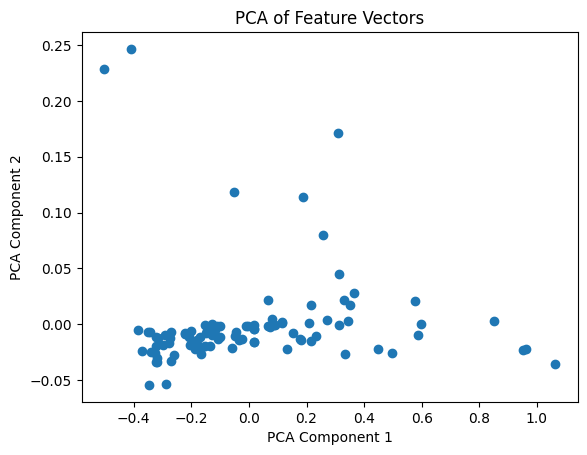

In [62]:
# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_np)

# Plot the PCA-reduced features
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title("PCA of Feature Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

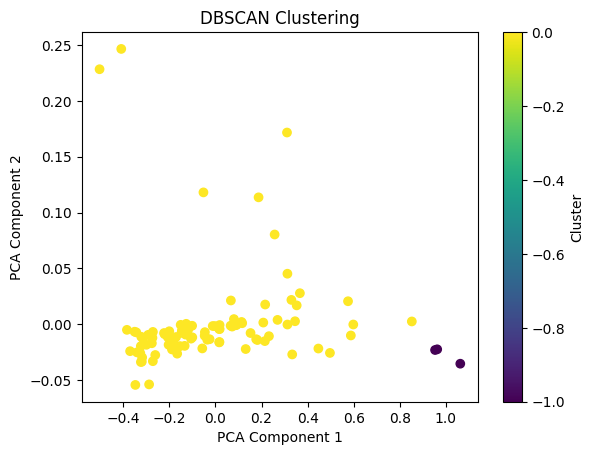

In [63]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)  # You may need to tune these parameters
labels_dbscan = dbscan.fit_predict(features_pca)

# Visualize the DBSCAN clustering results
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [70]:
np.where(features_pca[:, 1] > 0.1)

(array([ 0,  2, 13, 35, 94]),)

In [64]:
for i, label in enumerate(labels_dbscan):
    if label == -1:
        print(i)

12
21
41


In [50]:
img_dish.shape

(100, 1, 290, 280)

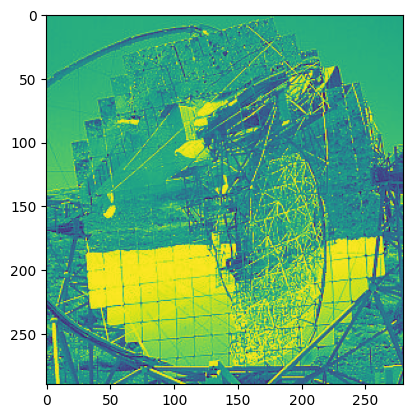

In [78]:
plt.imshow(img_dish[95, 0, :, :])